<a href="https://colab.research.google.com/github/FandiRahman/Data-Analysis/blob/main/Air%20BNB%20New%20York%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [55]:
# Menyiapkan semua library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [56]:
# Memuat tabel df_train
df_train = pd.read_csv("/content/drive/MyDrive/Air BNB New York 2/train.csv")
print(df_train.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

## Penilaian

In [57]:
# Menilai data df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [58]:
# Menilai parameter statistik data df_train
df_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [59]:
# Menilai missing value
df_train.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [60]:
# Menilai duplikasi data
print("Jumlah duplikasi: ", df_train.duplicated().sum())

Jumlah duplikasi:  0


## Data Cleaning

In [61]:
# Konversi tipe data kolom 'last_review'
df_train['last_review'] = pd.to_datetime(df_train['last_review'])
# Mengisi nilai null pada kolom 'reviews_per_month' dengan nilai rata-rata
mean_reviews_per_month = df_train['reviews_per_month'].mean()
df_train['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)
# Menampilkan data setelah perbaikan
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [62]:
# Mengisi nilai kosong pada kolom 'name' dengan "Unknown"
df_train['name'].fillna('Unknown', inplace=True)
# Mengisi nilai kosong pada kolom 'host_name' dengan "Unknown"
df_train['host_name'].fillna('Unknown', inplace=True)
# Mengisi nilai kosong pada kolom 'last_review' dengan tanggal awal
df_train['last_review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)
# Menampilkan data setelah perbaikan
df_train.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## EDA

In [63]:
# Menampilkan parameter statistik untuk perbandingan harga kamar
room_type_neighbourhood_stats = df_train.groupby(['room_type', 'neighbourhood_group'])['price'].describe()

# Menampilkan hasil
print(room_type_neighbourhood_stats)

                                       count        mean         std   min  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                  379.0  127.506596   95.027102  28.0   
                Brooklyn              9559.0  178.327545  226.415825   0.0   
                Manhattan            13199.0  249.239109  331.830132   0.0   
                Queens                2096.0  147.050573  129.383208  10.0   
                Staten Island          176.0  173.846591  394.600216  48.0   
Private room    Bronx                  652.0   66.788344  107.009071   0.0   
                Brooklyn             10132.0   76.500099  124.713499   0.0   
                Manhattan             7982.0  116.776622  190.191318  10.0   
                Queens                3372.0   71.762456  180.506756  10.0   
                Staten Island          188.0   62.292553   36.138245  20.0   
Shared room     Bronx                   60.0   59.800000  101.79

In [64]:
# Menghitung rata-rata harga per malam berdasarkan wilayah dan jenis kamar
room_type_neighbourhood_stats_mean = df_train.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

# Menampilkan hasil
print(room_type_neighbourhood_stats_mean)

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64


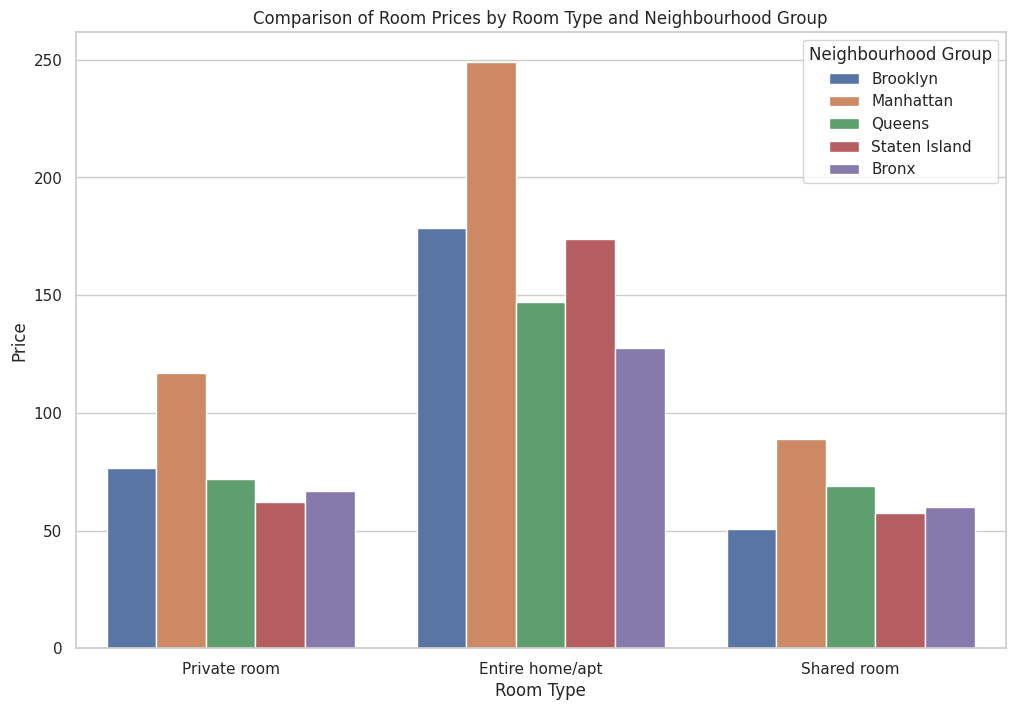

In [65]:
# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=df_train, ci=None)

# Menambahkan label dan judul
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Comparison of Room Prices by Room Type and Neighbourhood Group')

# Menampilkan legenda
plt.legend(title='Neighbourhood Group')

# Menampilkan plot
plt.show()

In [67]:
# Menghitung jumlah properti untuk setiap kelompok lingkungan
neighbourhood_group_counts = df_train['neighbourhood_group'].value_counts()
# Menampilkan hasil
print(neighbourhood_group_counts)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [68]:
# Menghitung jumlah properti untuk setiap kombinasi room type dan neighbourhood group
room_type_neighbourhood_counts = df_train.groupby(['room_type', 'neighbourhood_group']).size().reset_index(name='counts')
# Menampilkan hasil
print(room_type_neighbourhood_counts)

          room_type neighbourhood_group  counts
0   Entire home/apt               Bronx     379
1   Entire home/apt            Brooklyn    9559
2   Entire home/apt           Manhattan   13199
3   Entire home/apt              Queens    2096
4   Entire home/apt       Staten Island     176
5      Private room               Bronx     652
6      Private room            Brooklyn   10132
7      Private room           Manhattan    7982
8      Private room              Queens    3372
9      Private room       Staten Island     188
10      Shared room               Bronx      60
11      Shared room            Brooklyn     413
12      Shared room           Manhattan     480
13      Shared room              Queens     198
14      Shared room       Staten Island       9


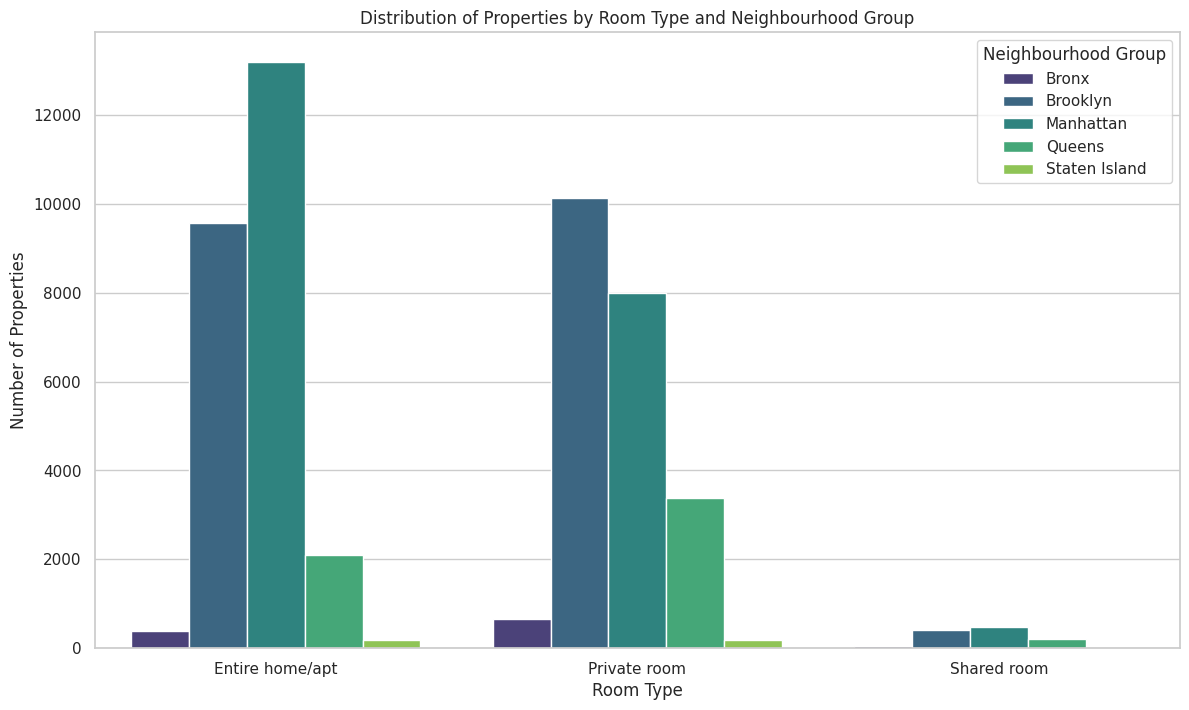

In [71]:
# Membuat diagram batang
plt.figure(figsize=(14, 8))
sns.barplot(x='room_type', y='counts', hue='neighbourhood_group', data=room_type_neighbourhood_counts, palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Number of Properties')
plt.title('Distribution of Properties by Room Type and Neighbourhood Group')
plt.legend(title='Neighbourhood Group')
plt.show()